In this project, since I listen to a lot of music, I wanted to visualize my music tastes and see how my music habits change over the seasons. I got this data from downloading my Spotify; it has value to me as it is my entire music catalog that I have been listening to for years. When I first downloaded the data, it was a zipped file that contained all my different Spotify data files. I only used the JSON files named "Streaming History" for my analysis.

I cleaned and changed the data around to make the labels are the table easier to read. For example, it used to label things as 'artistsName". I changed it to just artists for simplicity. The analysis conducted was to determine if I listen to more music in the wintertime compared to other seasons and to see how different my listening habits are for each season. 

What I learned from this analysis is that I listen to more music in the winter. This brings up a new question of what factors cause me to listen to more music in the winter, like the type of environment, how stressed I am, and seasons can determine which genres I listen to and how those genres can change over the seasons. Some limitations are that this is only my Spotify listening habits; I tend to listen to music on a variety of platforms. 

Anyone viewing this report can take away how each season can change someone's listening habits. 

In [22]:
import json
import pandas as pd
import os 
from datetime import datetime
import matplotlib.pyplot as plt


In [23]:
with open("/Users/romanbryenton/Desktop/Spotify Account Data/StreamingHistory_music_0.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [24]:
df = df.rename(columns={
    'endTime': 'end_time',
    'artistName': 'artist',
    'trackName': 'track',
    'msPlayed': 'ms_played'
})

In [25]:
df['end_time'] = pd.to_datetime(df['end_time'])
df['ms_played'] = df['ms_played'].astype(int)

In [26]:
df['year'] = df['end_time'].dt.year
df['month'] = df['end_time'].dt.month
df['day'] = df['end_time'].dt.day
df['hour'] = df['end_time'].dt.hour
df['weekday'] = df['end_time'].dt.day_name()

In [27]:
def get_season(date):
    m = date.month
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['season'] = df['end_time'].apply(get_season)

In [16]:
df = df[df['ms_played'] > 10000]

In [17]:
df = df.drop_duplicates()
df = df.sort_values('end_time')
df = df.reset_index(drop=True)

In [29]:
df['season'].value_counts()

season
Winter    6947
Spring    2207
Fall       846
Name: count, dtype: int64

In [30]:
season_table = df.groupby('season').size().reset_index(name='play_count')
season_table


,season,play_count
0,Fall,846
1,Spring,2207
2,Winter,6947


In [20]:
df.head(15)

,end_time,artist,track,ms_played,year,month,day,hour,weekday,season
0,2024-11-14 01:16:00,Briston Maroney,Freakin' Out On the Interstate,13421,2024,11,14,1,Thursday,Fall
1,2024-11-14 17:23:00,fats'e,room to breathe,174242,2024,11,14,17,Thursday,Fall
2,2024-11-14 17:28:00,916frosty,enough,232418,2024,11,14,17,Thursday,Fall
3,2024-11-14 17:30:00,Jack Kays,MORBID MIND,136750,2024,11,14,17,Thursday,Fall
4,2024-11-14 18:35:00,Jack Kays,MORBID MIND,99219,2024,11,14,18,Thursday,Fall
5,2024-11-14 18:36:00,Cuco,One and Only,15952,2024,11,14,18,Thursday,Fall
6,2024-11-14 18:36:00,Of Monsters and Men,Mountain Sound,26656,2024,11,14,18,Thursday,Fall
7,2024-11-14 23:03:00,Antwon,BUTTERFLY KISSES,117423,2024,11,14,23,Thursday,Fall
8,2024-11-15 00:57:00,Lil Peep,Lose My Mind,34965,2024,11,15,0,Friday,Fall
9,2024-11-15 00:59:00,Lil Peep,Lose My Mind,127349,2024,11,15,0,Friday,Fall


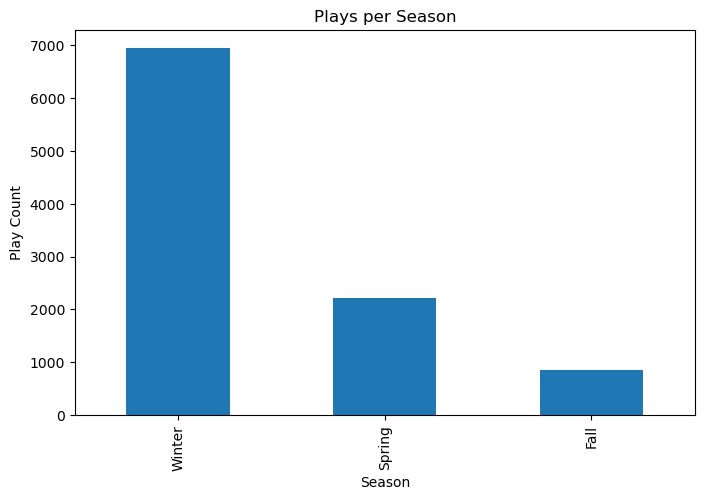

In [31]:
df['season'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Plays per Season")
plt.xlabel("Season")
plt.ylabel("Play Count")
plt.show()


# In this analysis you can see how hypothesis was correct and that I listen to a lot more music in the winter then every other season.